In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [21]:
# Read the raw data from prepared xlsx file
df = pd.read_excel(
    './data_final.xlsx',
    usecols=['old_data', 'label']
)

# Chuẩn hóa Unicode

Trong tiếng Việt, có 2 loại Unicode chính:
1. **Unicode tổ hợp**: Ký tự và dấu thanh được ghép lại từ nhiều mã Unicode.
2. **Unicode dựng sẵn**: Ký tự và dấu thanh được mã hóa sẵn trong một mã Unicode duy nhất.

> Sự khác biệt giữa hai loại Unicode có thể khiến hai từ giống nhau về mặt hiển thị nhưng bị coi là khác nhau khi xử lý bằng máy tính. Do đó, cần chuẩn hóa tất cả về Unicode dựng sẵn để đảm bảo tính nhất quán.

### Mã nguồn Python:

```python
def chuan_hoa_unicode(text):
    text = unicodedata.normalize('NFC', text)  # Chuẩn hóa về dạng Unicode dựng sẵn
    return text



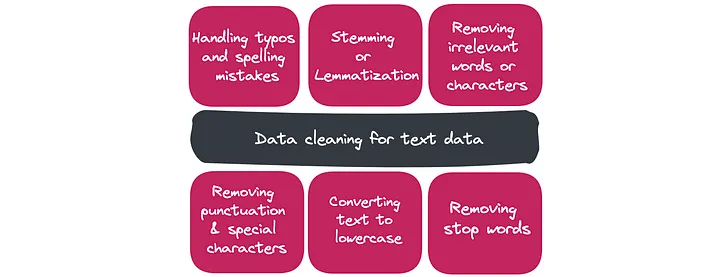

In [22]:
import unicodedata

def UNICODE_normalize(text):
    text = unicodedata.normalize('NFC', text)

    return text

df['old_data'] = df['old_data'].apply(UNICODE_normalize)

In [23]:
from preprocessing import *

def PREPROCESSING(text):
    text = chuan_hoa_unicode(text)
    text = chuan_hoa_dau_cau_tieng_viet(text)
    text = tach_tu_tieng_viet(text)
    text = chuyen_chu_thuong(text)
    text = chuan_hoa_cau(text)
    return text

df['tranform_data'] = df['old_data'].apply(PREPROCESSING)

In [24]:
df[
    df.duplicated(subset=['tranform_data', 'label'], keep=False)
].sort_values(['tranform_data', 'label'])[[
    'tranform_data',
    'label',
]].head(20)\
.style.set_properties(subset=['tranform_data'], **{
    'width': '1000px',
    'text-align': 'justify',
    'font-size': '16px',
    'font-weight': 'italic',

})\
.set_properties(subset=['label'], **{
    'width': '100px',
    'text-align': 'center',
    'font-size': '16px',
    'font-weight': 'bold',
})\
.background_gradient(cmap='viridis')\
.set_table_styles([{
    'selector': 'td',
    'props': [
        ('border', '1px solid white'),
    ]
}])

,tranform_data,label
4820,1 chất_liệu cứng hơn dây hãng một_chút 2 màu_sắc khá giống trên ảnh nhưng những màu càng sáng thì độ lệch màu càng cao các bạn lưu_ý 3 sản_phẩm được hoàn_thiện khá tốt ôm khít mặt mnhắn tinand và giống dây hãng khoảng 80 90 kết_luận với tầm giá 10k thì sản_phẩm đã rất tốt,1
11656,1 chất_liệu cứng hơn dây hãng một_chút 2 màu_sắc khá giống trên ảnh nhưng những màu càng sáng thì độ lệch màu càng cao các bạn lưu_ý 3 sản_phẩm được hoàn_thiện khá tốt ôm khít mặt mnhắn tinand và giống dây hãng khoảng 80 90 kết_luận với tầm giá 10k thì sản_phẩm đã rất tốt,1
2725,1 giao hàng không thật_sự vui_vẻ nhân_viên giao hành tiki chất_lượng ngày_càng xuống 2 giá_thành ổn so với bên fpt tuy_nhiên hộp không hoàn_chỉnh các chi_tiết của hộp lệch và bẩn 3 nút bấm cuộn của chuột không chắc_chắn lúc cuộc sẽ ộp ẹp và rời khời đường lăn 4 khen cảm giá di_chuột rất ổn cùng tầm giá có những con chuột chỉ sử_dụng ở bề_mặt vân gỗ chuột này có_thể sử_dụng ở nhiều bề_mặt khác nhau,2
2735,1 giao hàng không thật_sự vui_vẻ nhân_viên giao hành tiki chất_lượng ngày_càng xuống 2 giá_thành ổn so với bên fpt tuy_nhiên hộp không hoàn_chỉnh các chi_tiết của hộp lệch và bẩn 3 nút bấm cuộn của chuột không chắc_chắn lúc cuộc sẽ ộp ẹp và rời khời đường lăn 4 khen cảm giá di_chuột rất ổn cùng tầm giá có những con chuột chỉ sử_dụng ở bề_mặt vân gỗ chuột này có_thể sử_dụng ở nhiều bề_mặt khác nhau,2
1670,1 giao hàng nhanh bình_thường 2 đóng_gói cẩn_thận 3 màn thiết_kế đơn_giản đẹp viền cũng mỏng 4 màn có loa tích_hợp cũng rất tiện 5 2850k cho cái màn chấp_nhận được 6 màn k bị hở sáng 5 sao,4
1680,1 giao hàng nhanh bình_thường 2 đóng_gói cẩn_thận 3 màn thiết_kế đơn_giản đẹp viền cũng mỏng 4 màn có loa tích_hợp cũng rất tiện 5 2850k cho cái màn chấp_nhận được 6 màn k bị hở sáng 5 sao,4
2402,1 màn_hình có hiện_tượng hiển_thị màu xanh dương vàng cam bị rỗ sọc trắng xem phim thì k vấn_đề nhưng làm thiết_kế đồ_họa rất khó_chịu vì sai hiển_thị 2 đã báo tiki support và có gọi điện confirm sẽ đổi trả từ ngày 1912 mà đến hết ngày 2412 chưa thấy nhân_viên đến để đổi thất_vọng về cách phục_vụ sau bán hàng,0
2412,1 màn_hình có hiện_tượng hiển_thị màu xanh dương vàng cam bị rỗ sọc trắng xem phim thì k vấn_đề nhưng làm thiết_kế đồ_họa rất khó_chịu vì sai hiển_thị 2 đã báo tiki support và có gọi điện confirm sẽ đổi trả từ ngày 1912 mà đến hết ngày 2412 chưa thấy nhân_viên đến để đổi thất_vọng về cách phục_vụ sau bán hàng,0
21487,1 pin hao hơi nhanh hao nhanh hơn oppo a5s mới đã dùng tháng thứ 5 2 các ứng_dụng ngầm hoặc các ứng_dụng khác ko dùng như duo yt music play phim đã buộc dừng hoặc gỡ cài_đặt rồi nhưng khi cập_nhật bản vá mới thì các ứng_dụng đó ko còn ở trạng_thái buộc dừng nữa và hiển_thị trên màn_hình điện_thoại nên lại phải thực_hiện buộc dừnggỡ có cách nào xử_lý ko ạ,0
25980,1 pin hao hơi nhanh hao nhanh hơn oppo a5s mới đã dùng tháng thứ 5 2 các ứng_dụng ngầm hoặc các ứng_dụng khác ko dùng như duo yt music play phim đã buộc dừng hoặc gỡ cài_đặt rồi nhưng khi cập_nhật bản vá mới thì các ứng_dụng đó ko còn ở trạng_thái buộc dừng nữa và hiển_thị trên màn_hình điện_thoại nên lại phải thực_hiện buộc dừnggỡ có cách nào xử_lý ko ạ,0


In [25]:
df.shape

(26911, 3)

In [26]:
df.drop_duplicates(subset=['tranform_data', 'label'], keep='first', inplace=True) # Xóa dữ liệu trùng lặp

# Xóa bad words

In [27]:
import json
with open('bad_words.json', 'r', encoding='utf-8') as f:
    bad_words_dict = json.load(f)
bad_words = list(bad_words_dict.keys())

In [28]:
import re
def remove_bad_words(text, bad_words):
    bad_words_pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in bad_words) + r')\b', re.IGNORECASE)
    return bad_words_pattern.sub('', text)

df['old_data'] = df['old_data'].apply(lambda x: remove_bad_words(x, bad_words))
df['tranform_data'] = df['tranform_data'].apply(lambda x: remove_bad_words(x, bad_words))

In [29]:
tmp = df.groupby(
    [
        'tranform_data',
    ]
).size().reset_index(name='counts')

In [30]:
tmp.sort_values('counts', ascending=False).head(30)\
.style.set_properties(subset=['tranform_data'], **{
    'width': '1000px',
    'text-align': 'justify',
    'font-size': '16px',
    'font-weight': 'italic',

})\
.set_properties(subset=['counts'], **{
    'width': '100px',
    'text-align': 'center',
    'font-size': '16px',
    'font-weight': 'bold',
})\
.background_gradient(cmap='viridis')\
.set_table_styles([{
    'selector': 'td',
    'props': [
        ('border', '1px solid white'),
    ]
}])

,tranform_data,counts
960,chất_lượng phục_vụ tốt máy tắm thời ok còn về lâu_dài thì phải chờ mới biết sẽ phản_hồi sau khi có kết_quả,3
2754,giao hàng nhanh,3
7194,máy ngon đẹp pin trâu mọi thứ đều ok trừ việc mua ốp k ra nhân_viên tư_vấn nhiệt_tình tgdd đập đá huế,3
7107,máy mặt sao bóng_bẩy soi gương đc máy khá dầy nhưng k đòi_hỏi gì với giá 3tr610 chip khá pin sục khá nhanh pin 5k như 4k sạc 18w cho viên pin 5k chờ luôn cam sao khá cam trc phế lqmb pupg tạm chấp_nhận đc mua về nếu tác vụ thông_thường fb zalo v v thì mượt sài đc chắc hơn ngày còn game thì tầm 8 10 tiếng là tèo nhân_viên tgdđ nhiệt_tình các kiểu con đà_điểu,3
7290,máy pin trâu nhưng 1 điều khá là lỗi kết nội mạng lâu_lâu lại bị gián_đoạn lúc đang chơi game thì bị ngắt chán không muốn nói thử dùng 2 máy treo game thì thấy rõ_rệt lâu_lâu bị gián_đoạn phải kết_nối lại thử bằng 2 loại máy khác hãng mọi người cân_nhắc kĩ khi mua sản_phẩm này,3
7260,máy này xài rất ok nhưng loa rất rè chịu ko nổi vì mới mua xài nên hôm_nay mới lấy ra nghe hơi rè,3
6285,mua đc 5 ngày nói_chung giá máy này sài đc tất_cả ổn pin trâu nhung có gam 4g chơi game chạy hơi yếu cho 5 lùn cô bé tư_vấn huỳnh thị thu sang mỹ long rất dễ_thương nhiệt_tình,3
6809,máy cũng đc giá hơi cao chưa sd vivo bao h nhưng thấy ổn thiết_kế đẹp đã sd hơn tháng vẫn ổn,3
2539,e mới mua lúc sáng mơi thủ đều ổn rất ok chỉ có camera sau bị tôi qua kg biết vận đề gì ạh,3
1418,con này bộ_nhớ trong khủng nhỉ 128g luôn 5 triệu thì ngon nhung chạy chíp p60 thì hợp_lý chíp hơi yếu,3


In [31]:
fre_more_then_2 = tmp[tmp.counts > 1].tranform_data.to_list()

In [32]:
tmp[tmp.counts > 1].sort_values('counts', ascending=True)[tmp.tranform_data == 'tốt']

C:\Users\trant\AppData\Local\Temp\ipykernel_29160\1435660196.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp[tmp.counts > 1].sort_values('counts', ascending=True)[tmp.tranform_data == 'tốt']


,tranform_data,counts
14594,tốt,2


In [33]:
col = [
    'tranform_data',
    'label',
]

In [34]:
df[col][df['tranform_data'].isin(
    fre_more_then_2
)].head(32)\
.sort_values([
    'tranform_data',
    'label'
])\
.style.set_properties(subset=['tranform_data'], **{
    'width': '1000px',
    'text-align': 'justify',
    'font-size': '16px',
    'font-weight': 'italic',

})\
.set_properties(subset=['label'], **{
    'width': '100px',
    'text-align': 'center',
    'font-size': '16px',
    'font-weight': 'bold',
})\
.background_gradient(cmap='viridis')\
.set_table_styles([{
    'selector': 'td',
    'props': [
        ('border', '1px solid white'),
    ]
}])

,tranform_data,label
211,bản_thân sản_phẩm đánh_giá 4 sao trừ 1 sao điểm vận_chuyển mất tiền để vận_chuyển tiki hôm sau nhưng tận 19 ngày sau mới nhận được hàng trừ tiếp 1 điểm về việc trả_lời thắc_mắc của tổng_đài 3 lần gọi lên tổng_đài hai lần báo kiểm_tra và gọi lại báo tình_hình nhưng ko hề gọi lại lần thứ 3 thì có nói được lý_do nhưng từ lúc đó đến khi nhận đc hàng cũng gần 1 tuần về tính_năng định_vị tikinow tiki nên cải_thiện lại nếu_như địa_chỉ của mình ko hỗ_trợ vui_lòng đừng hiện làm mình mất tiền mà ko hề được vận_chuyển theo thời_gian tương_ứng vốn_dĩ rất mến tiki nhưng trải nghiệm xấu_xí này làm mất điểm khá nhiều,3
210,chọn lui chọn tới mãi cuối_cùng quyết_định lấy dell p2319h này dù thông_số không nổi_bật so với 1 vài màn khác trong tầm giá nhưng bù lại thích cái thiết_kế này cực nhìn cứng_cáp chắc_chắn thích nhất vẫn là việc màn_hình có_thể lên xuống trái phải rất tiện màn_hình hiển_thị màu_sắc ngon sắc nét vì mình k chơi game nên k quan_trọng tần_số quét lắm hàng đóng_gói kĩ chọn gói ship thường nhưng đặt chiều nay là sáng_mai có hàng giao rồi tiếc là màn ko đi kèm dây hdmi,4
91,cũng oke lắm nhưng không lên được 75hz như tiêu_đề,1
101,cũng oke lắm nhưng không lên được 75hz như tiêu_đề,2
102,cửa_hàng hỏi tại_sao chân_đế bị mad điện giựt có đem bảo_hành được k,0
92,cửa_hàng hỏi tại_sao chân_đế bị mad điện giựt có đem bảo_hành được k,1
209,dùng màn_hình này coi mấy video 4k với hd là siêu phê lun chất_lượng rất ổn xoay đủ các hướng chỉnh cao thấp cũng được mỗi tội dây nguồn lỏng_lẻo quá mỗi lần mình xoay màn_hình là tuột nhẹ nên màn_hình tối thui phải cắm lại hic,1
113,hàng đóng_gói cẩn_thận máy hoạt_động tương_đối ổn ảnh in ra chất_lượng ở mức_độ trung_bình tuy_nhiên so với mức giá này chấp_nhận được khuyến_cáo không nên sử_dụng để in ảnh thương mai hàng mua của tiki trading nhưng lại giao hàng qua đối_tác ninja van và ninja van giao hàng chậm cũng không có tin nhắn hay mail thông_báo việc trễ hẹn giao,1
123,hàng đóng_gói cẩn_thận máy hoạt_động tương_đối ổn ảnh in ra chất_lượng ở mức_độ trung_bình tuy_nhiên so với mức giá này chấp_nhận được khuyến_cáo không nên sử_dụng để in ảnh thương mai hàng mua của tiki trading nhưng lại giao hàng qua đối_tác ninja van và ninja van giao hàng chậm cũng không có tin nhắn hay mail thông_báo việc trễ hẹn giao,4
139,mua hàng công_nghệ trên tiki nhiều lần rồi nên khá tin_tưởng hàng chính hãng nên yên tam nhé mọi người vài dòng chia_sẻ lười chụp ảnh vì mua nhiều thứ quá,1


In [35]:
group_label = df.groupby('tranform_data')['label'].apply(lambda x: '_'.join(map(str, sorted(x.unique())))).reset_index().sort_values('label')

In [36]:
f_table = group_label.value_counts("label").reset_index()
f_table['label'] = f_table['label'].astype(str)

f_table[
    f_table.label.str.len() > 1
].sort_values(by='label', key=lambda x: x.str.len())\
.style.set_properties(subset=['count'], **{
    'width': '100px',
    'text-align': 'center',
    'font-size': '16px',
    'font-weight': 'italic',

})\
.set_properties(subset=['label'], **{
    'width': '100px',
    'text-align': 'center',
    'font-size': '16px',
    'font-weight': 'bold',
})\
.background_gradient(cmap='viridis')\
.set_table_styles([{
    'selector': 'td',
    'props': [
        ('border', '1px solid white'),
    ]
}])

,label,count
4,1_2,802
5,1_4,634
6,0_2,599
9,0_1,204
10,0_3,137
11,1_3,108
12,2_4,96
13,2_3,94
14,0_5,29
15,1_5,25


In [37]:
group_label.columns = ['tranform_data', 'label']
group_label['label'] = group_label['label'].astype(str)
group_label[group_label.apply(lambda x: len(x['label'].split('_')) > 2, axis=1)]\
.sort_values(
    by='label',
    key=lambda x: x.str.split('_')
)\
.style.set_properties(subset=['tranform_data'], **{
    'width': '1000px',
    'text-align': 'justify',
    'font-size': '16px',
    'font-weight': 'italic',

})\
.set_properties(subset=['label'], **{
    'width': '100px',
    'text-align': 'center',
    'font-size': '16px',
    'font-weight': 'bold',
})\
.background_gradient(cmap='viridis', subset='label')\
.set_table_styles([{
    'selector': 'td',
    'props': [
        ('border', '1px solid white'),
    ]
}])

,tranform_data,label
7290,máy pin trâu nhưng 1 điều khá là lỗi kết nội mạng lâu_lâu lại bị gián_đoạn lúc đang chơi game thì bị ngắt chán không muốn nói thử dùng 2 máy treo game thì thấy rõ_rệt lâu_lâu bị gián_đoạn phải kết_nối lại thử bằng 2 loại máy khác hãng mọi người cân_nhắc kĩ khi mua sản_phẩm này,0_1_2
7260,máy này xài rất ok nhưng loa rất rè chịu ko nổi vì mới mua xài nên hôm_nay mới lấy ra nghe hơi rè,0_1_2
8836,mới mua lúc chiều mà máy tụt pin quá mặc_dù pin tới 5000m màng hình hơi đơ nói_chung cũng ổn,0_1_2
6809,máy cũng đc giá hơi cao chưa sd vivo bao h nhưng thấy ổn thiết_kế đẹp đã sd hơn tháng vẫn ổn,0_1_2
2539,e mới mua lúc sáng mơi thủ đều ổn rất ok chỉ có camera sau bị tôi qua kg biết vận đề gì ạh,0_1_2
1418,con này bộ_nhớ trong khủng nhỉ 128g luôn 5 triệu thì ngon nhung chạy chíp p60 thì hợp_lý chíp hơi yếu,0_1_2
13533,tai_nghe tốt nhưng mà nghe không được lâu nhanh hết pin khó kết_nối,0_1_2
8831,mới mua hồi tối mình cảm_thấy sản_phẩm mà hình đẹp game mượt pin ok có điều bắt song 4g hơi kém dù mình đang ở tp,0_1_2
14999,vừa nghe 2 ngày đã hỏng 1 tai sạc pin không vào,0_2_3
11218,shop rất có trách_nhiệm ạ tai_nghe bị lỗi nhưng shop đổi lại cho em rồi,0_2_4


In [38]:
def color(val):
    return len(val.split('_'))

df.style.apply(color, subset = ['Fecha'])

df[col].sort_values(
    [
        'tranform_data',
        'label',
    ]   
).head(20)\
.style.set_properties(subset=['tranform_data'], **{
    'width': '1000px',
    'text-align': 'justify',
    'font-size': '16px',
    'font-weight': 'italic',

})\
.set_properties(subset=['label'], **{
    'width': '100px',
    'text-align': 'center',
    'font-size': '16px',
    'font-weight': 'bold',
})\
.background_gradient(cmap='viridis', subset=['label'])\
.set_table_styles([{
    'selector': 'td',
    'props': [
        ('border', '1px solid white'),
    ]
}])

,tranform_data,label
7360,sài tốt pin ngon máy mạnh màn_hình không thời_thượng bằng s10 nhưng camera mọi thứ là ngon quá_sức mong_đợi,1
7529,đẹp nhiều chức_năng bảo_mật rất hay mua dùm cho bà thím bà rất ưng_ý ok,1
5645,0 biết có phải do tương_thích mà máy asus x407 nhận nó rất cực cho mỗi lần setup win mà phải install nó lại vào thiết_bị bluetooth phải cả 30min mới nhận trong danh_sách bluetooth nhận xong thì lúc tắt máy_tính lần sau nó còn đó mà phải nhấn nút bluetooth vài lần nó mới chạy lại win mình đang dùng bản 1809 bản_quyền asus,2
8096,0 sao biết trước là sẽ hỏng trong 1 khoảng thời_gian ngắn nhưng ai_ngờ mới bóc hộp cắm sạc thử ngay thì sạc được số đen không có ý_định đổi hoặc trả đâu chỉ nhắn và gọi thử thôi_thì trả_lời giờ để giá sách làm cảnh thôi,0
12642,0 sao biết trước là sẽ hỏng trong 1 khoảng thời_gian ngắn nhưng ai_ngờ mới bóc hộp cắm sạc thử ngay thì sạc được số đen không có ý_định đổi hoặc trả đâu chỉ nhắn và gọi thử thôi_thì trả_lời giờ để giá sách làm cảnh thôi,3
9690,1 bên không nghe được bao_nhiêu dù đã chỉnh rồi sạc 5 phút nóng hỏi,0
13650,1 bên không nghe được bao_nhiêu dù đã chỉnh rồi sạc 5 phút nóng hỏi,2
16216,1 bên tai gia_công kém giao hàng nhanh hơn dự_kiến 1 ngày tai_nghe rất ổn nghe nhạc edm rất phê,2
16416,1 bên tai_nghe bị rè nghe rất khó_chịu đó shop ơi,2
13192,1 bên tai_nghe dùng 5p hết pin đã nhắn_tin shop nhưng không trả_lời,2


In [39]:
df[col].head(20).style.set_properties(subset=['tranform_data'], **{
    'width': '1000px',
    'text-align': 'justify',
    'font-size': '16px',
    'font-weight': 'italic',

})\
.set_properties(subset=['label'], **{
    'width': '100px',
    'text-align': 'center',
    'font-size': '16px',
    'font-weight': 'bold',
})\
.background_gradient(cmap='viridis', subset=['label'])\
.set_table_styles([{
    'selector': 'td',
    'props': [
        ('border', '1px solid white'),
    ]
}])

,tranform_data,label
0,shop giao sản_phẩm đã qua sử_dụng không hài_lòng về sản_phẩm,0
1,đóng_gói cẩn_thận sp mới và nhỏ gọn rất hài_lòng cám_ơn tiki,4
2,sản_phẩm nhỏ gọn giao hàng rất nhanh,1
3,sản_phẩm rất chuẩn so vs quảng_cáo,1
4,nhỏ gọn gê,1
5,ổ_cứng chạy rất nhanh nhỏ hơn mình nghĩ nhưng khá bền và cầm êm,1
6,sản_phẩm_chất_lượng chính hãng rất hài_lòng nhận đúng hàng,1
7,hàng giao nhanh xai rất ổn_định mình xài cũng cả tháng rồi chép film 10 mấy gb xem trên tv bình_thường ko hề bị giật lag gi het,4
8,ổ_cứng nhỏ gọn và tốc_độ truyền dữ_liệu nhanh dùng lưu_trữ dữ_liệu văn_phòng rất phù_hợp,1
9,tốc_độ nhanh nhỏ gọn hơn nhiều so với mình tưởng_tượng,1


In [40]:
df.sort_values(
    [
        'tranform_data',
        'label',
    ]   
).drop_duplicates(subset=['tranform_data'], keep='first').style.set_properties(subset=['tranform_data'], **{
    'width': '1000px',
    'text-align': 'justify',
    'font-size': '16px',
    'font-weight': 'italic',

})\
.set_properties(subset=['label'], **{
    'width': '100px',
    'text-align': 'center',
    'font-size': '16px',
    'font-weight': 'bold',
})\
.background_gradient(cmap='viridis', subset=['label'])\
.set_table_styles([{
    'selector': 'td',
    'props': [
        ('border', '1px solid white'),
    ]
}]).to_excel('preprocessed_data.xlsx', index=False)